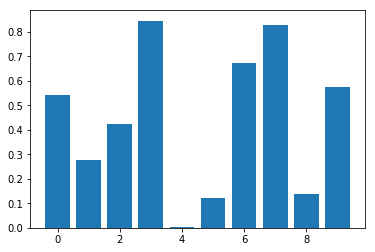

In [31]:
#modified RL sample based on MSDN article by Frank lavigne
#same logic - renamed variables and added some tracing capability

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(100)
slotmachines = 10 #esaier to view metrics 
winprobs     =  np.random.uniform(0,1,slotmachines)

plt.bar(np.arange(len(winprobs)),winprobs)
plt.show()

In [32]:
# set initial knowledge of winning chances to zero for all machines
known_winprobs = np.zeros(slotmachines)

In [33]:
#pull the arm on one of the slot machines
def pull(amachine):
   x = np.random.uniform(0, 1)
   #print('random pull simulated value is ',x, '\tslotmachine probablity is at ', winprobs[amachine])
   if (x <= winprobs[amachine]):
    return(10)
   else:
    return(-1)

In [34]:
#let's test the function briefly
wins   = 0
slot2pull = 3
for machines in range(10):
     if (pull(slot2pull) > 0 ):
            wins = wins+1
print('testing: number of wins ',wins, ' for slot ', slot2pull)

testing: number of wins  8  for slot  3


In [35]:
#now let's set up a multi-armed bandit simulation
#arms = slotmachines ;   iterations = our choice of cycles to run ; epsilon = our choice of exploit/explore aggressiveness
#slot2pull is reset in here to capture the identity of the slot machine 'slot2pull' based on the decision to expoloit or explore
slot2pull = -1       #safety

def multi_armed_bandit(arms, iterations, epsilon):
    total_reward, optimal_action = [], []        #track rewards and a T/F on whether or not best slot was selected
    slot2pull     = -1                           #safety
    switches      = 0                            #track how many times we explored - changed our strategy
    lastpull      = -1                           #keep track of last pull so if we explore we can check if we actually selected the same slot
    expectedvalue = np.zeros(arms)               #array used to calculate expected value over iterations (plays)
    playcount     = np.zeros(arms)               #tracks # of plays for each slot machine
    slots         = np.arange(arms)              #the array of slot machines
    
    for i in range(0, iterations):
        epsilon_random = np.random.uniform(0, 1)     
        if epsilon_random > epsilon :
            # exploit
            slot2pull = np.argmax(expectedvalue)
            #print('exploiting: ',slot2pull)
        else :
            # explore
            #slot2pull   = np.random.choice(slots) #np.arange(arms)) #note how this could, on occasion, choose the same slotmachine anyway
            print('exploring -  lastpull:',np.delete(slots,slots[lastpull]))
            slot2pull   = np.random.choice(np.delete(slots,slots[lastpull])) #fix the above jw 3/13
            switches += 1
            if (lastpull == slot2pull):
                print('\texplore but no real change: ',slot2pull)
            else:
                print('\texplore with a change: ',lastpull, ' : ',  slot2pull)
        lastpull = slot2pull
        reward   = pull(slot2pull)
        #estimate is the reward for each of the slot machines- a value function
        #since this is a lot lets dump out the values before the calc
        slotfrequency  = 1/(playcount[slot2pull]+1)                      #added for tracing 
        expval1slot    = expectedvalue[slot2pull]                        #ditto
        rewardless     = (reward - expval1slot)
        estimate       = (expval1slot + (slotfrequency * rewardless))   #added for tracing
        
        print('slot exp value is ',expval1slot)
        print('\tslot2pull is: ',slot2pull, ', playcount is:',playcount[slot2pull], ', 1/(playcount[slot2pull]+1) is: ', 1/(playcount[slot2pull]+1) , ', reward: ', reward,' estimate: ',estimate)#new
        expectedvalue[slot2pull] = expectedvalue[slot2pull] + (1/(playcount[slot2pull]+1)) * (reward - expectedvalue[slot2pull])
        
        total_reward.append(reward)
        #optimal action is the best result from the array of estimated payout frequencies - using argmax to determine it
        #and compare to estimated payout. append the result (true or false) to the optimal_action list 
        optimal_action.append(slot2pull == np.argmax(expectedvalue))
        playcount[slot2pull] += 1           #keep track of pulls for each slot since they will vary due to epsilon and initial winprob
    print('expected value: ', expectedvalue)
    
    print('Dump the playcount of pulls per slotmachine\t',playcount)
    print('Number of explorations that occurred: ',switches)
    return(expectedvalue, total_reward)

Graphing the Initial Actual Odds for  10  slot machines


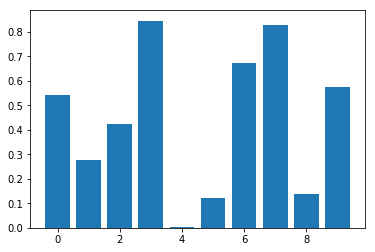

slot exp value is  0.0
	slot2pull is:  0 , playcount is: 0.0 , 1/(playcount[slot2pull]+1) is:  1.0 , reward:  -1  estimate:  -1.0
slot exp value is  0.0
	slot2pull is:  1 , playcount is: 0.0 , 1/(playcount[slot2pull]+1) is:  1.0 , reward:  -1  estimate:  -1.0
exploring -  lastpull: [0 2 3 4 5 6 7 8 9]
	explore with a change:  1  :  8
slot exp value is  0.0
	slot2pull is:  8 , playcount is: 0.0 , 1/(playcount[slot2pull]+1) is:  1.0 , reward:  -1  estimate:  -1.0
slot exp value is  0.0
	slot2pull is:  2 , playcount is: 0.0 , 1/(playcount[slot2pull]+1) is:  1.0 , reward:  -1  estimate:  -1.0
exploring -  lastpull: [0 1 3 4 5 6 7 8 9]
	explore with a change:  2  :  6
slot exp value is  0.0
	slot2pull is:  6 , playcount is: 0.0 , 1/(playcount[slot2pull]+1) is:  1.0 , reward:  10  estimate:  10.0
slot exp value is  10.0
	slot2pull is:  6 , playcount is: 1.0 , 1/(playcount[slot2pull]+1) is:  0.5 , reward:  10  estimate:  10.0
slot exp value is  10.0
	slot2pull is:  6 , playcount is: 2.0 , 1/(

	slot2pull is:  5 , playcount is: 3.0 , 1/(playcount[slot2pull]+1) is:  0.25 , reward:  -1  estimate:  -1.0
slot exp value is  8.935483870967742
	slot2pull is:  3 , playcount is: 31.0 , 1/(playcount[slot2pull]+1) is:  0.03125 , reward:  10  estimate:  8.96875
slot exp value is  8.96875
	slot2pull is:  3 , playcount is: 32.0 , 1/(playcount[slot2pull]+1) is:  0.030303030303030304 , reward:  -1  estimate:  8.666666666666666
slot exp value is  8.666666666666666
	slot2pull is:  3 , playcount is: 33.0 , 1/(playcount[slot2pull]+1) is:  0.029411764705882353 , reward:  10  estimate:  8.705882352941176
slot exp value is  8.705882352941176
	slot2pull is:  3 , playcount is: 34.0 , 1/(playcount[slot2pull]+1) is:  0.02857142857142857 , reward:  -1  estimate:  8.428571428571427
slot exp value is  8.447058823529407
	slot2pull is:  7 , playcount is: 85.0 , 1/(playcount[slot2pull]+1) is:  0.011627906976744186 , reward:  10  estimate:  8.465116279069763
slot exp value is  8.465116279069763
	slot2pull is:

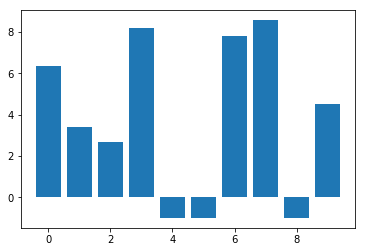

learned value array [ 6.33333333  3.4         2.66666667  8.16666667 -1.         -1.
  7.8         8.56074766 -1.          4.5       ]


In [36]:
#
print ("Graphing the Initial Actual Odds for ", slotmachines, ' slot machines')
plt.bar(np.arange(len(winprobs)),winprobs)
#plt.scatter(data=winprobs,x=slotmachines,y=len(winprobs))
plt.show()
epstest    = 0.2 #epsilon value to test
iterations = 200 #start small

#print('\n Graphing learned payout odds (i.e. our best slot to play) over ', slotmachines,'slot machines')
learnedvalue, rewards = multi_armed_bandit(slotmachines, iterations, epstest)
print('Graphing learned Value (i.e. our best slot to play) over ', slotmachines,'slot machines')
plt.bar(np.arange(len(learnedvalue)),learnedvalue)


print ("Our Total Reward for ",iterations,' iterations is ', sum(rewards))

print("Note how the total reward is NOT the number of iterations multiplied by the highest learnedvalue(the best)")
print("this is because of our exploits which are sometimes less rewarding and deduct from our total rewards")
print('Theoretical best is ',iterations, ' * ', learnedvalue[np.argmax(learnedvalue)], \
      ' = ' ,iterations * learnedvalue[np.argmax(learnedvalue)])
print('Observed rewards are: ', sum(rewards))

print('Graphing learned value (i.e. our best slot to play) over ', slotmachines,'slot machines', ' is machine: ', \
      np.argmax(learnedvalue))
plt.show()
print('learned value array' ,learnedvalue)
#print('\n\n reward per iteration:',rewards)